In [25]:
import itertools
import multiprocessing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = "white"

from reservoir import reservoir as res
from data import data
from error import error

In [4]:
LAMBDA = 0.9056     # lorenz lyapunov exponent
DEL_T = 0.02

TRIAL_RANGE = range(100)
TRAINING_LENGTH_RANGE = [20000, 40000, 60000, 80000, 100000]

In [5]:
def generate_dir(training_length, trial_num):
    dir = "results/training_lengths/20220719-100-20000-100000/{}/{}/".format(training_length, trial_num)

    return dir

def load_data(training_length, trial_num):
    dir = generate_dir(training_length, trial_num)

    lorenz_data = np.load(dir + "data.npz")
    results = np.load(dir + "results.npz")

    return lorenz_data, results

In [6]:
all_trials = {}
for training_length in TRAINING_LENGTH_RANGE:
    trials = {}
    for trial_num in TRIAL_RANGE:        
        trials[trial_num] = load_data(training_length, trial_num)

    all_trials[training_length] = trials

In [7]:
random_data = all_trials[60000][87][0]
random_results = all_trials[60000][87][1]
print("Data keys: ", end="")
for key in random_data.keys():
    print(key + ", ", end="")
print()
print("Results keys: ", end="")
for key in random_results.keys():
    print(key + ", ", end="")

Data keys: training_data, test_data, 
Results keys: W_r, W_in, W_out, preds, losses, 

In [8]:
training_data = random_data["training_data"]
test_data = random_data["test_data"]
W_r = random_results["W_r"]
W_in = random_results["W_in"]
W_out = random_results["W_out"]
preds = random_results["preds"]
losses = random_results["losses"]

Text(0, 0.5, 'x')

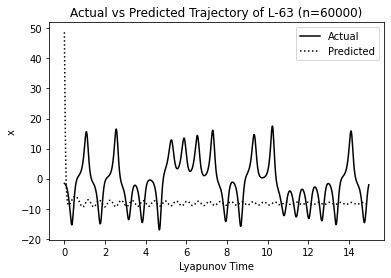

In [9]:
n = 60000
start = data.lyapunov_to_steps(0, LAMBDA, DEL_T)
end = data.lyapunov_to_steps(15, LAMBDA, DEL_T)
x_range = LAMBDA * DEL_T * np.array(range(start, end))
plt.plot(x_range, test_data[start:end, 0], color="black", label="Actual")
plt.plot(x_range, preds[start:end, 0], color="black", linestyle="dotted", label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Trajectory of L-63 (n={})".format(n))
plt.xlabel("Lyapunov Time")
plt.ylabel("x")

Text(0, 0.5, 'y')

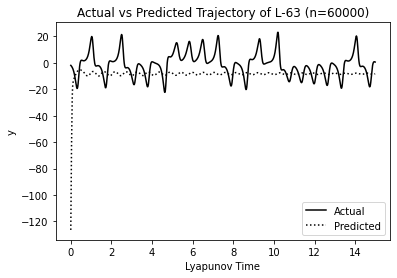

In [10]:
plt.plot(x_range, test_data[:end, 1], color="black", label="Actual")
plt.plot(x_range, preds[:end, 1], color="black", linestyle="dotted", label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Trajectory of L-63 (n={})".format(n))
plt.xlabel("Lyapunov Time")
plt.ylabel("y")

Text(0, 0.5, 'z')

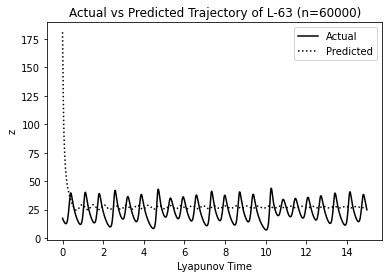

In [11]:
plt.plot(x_range, test_data[:end, 2], color="black", label="Actual")
plt.plot(x_range, preds[:end, 2], color="black", linestyle="dotted", label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Trajectory of L-63 (n={})".format(n))
plt.xlabel("Lyapunov Time")
plt.ylabel("z")

Text(0, 0.5, 'z')

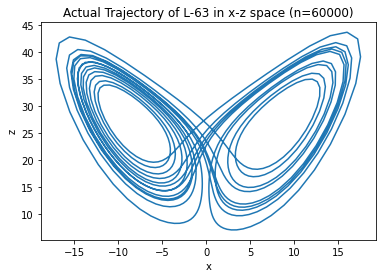

In [12]:
plt.plot(test_data[start:end, 0], test_data[start:end, 2])
plt.title("Actual Trajectory of L-63 in x-z space (n={})".format(n))
plt.xlabel("x")
plt.ylabel("z")

Text(0, 0.5, 'z')

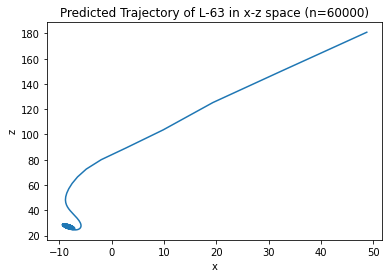

In [13]:
plt.plot(preds[start:end, 0], preds[start:end, 2])
plt.title("Predicted Trajectory of L-63 in x-z space (n={})".format(n))
plt.xlabel("x")
plt.ylabel("z")

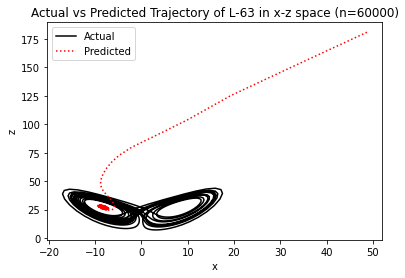

In [14]:
plt.plot(test_data[start:end, 0], test_data[start:end, 2], color="black", label="Actual")
plt.plot(preds[start:end, 0], preds[start:end, 2], color="red", linestyle="dotted", label="Predicted")
plt.title("Actual vs Predicted Trajectory of L-63 in x-z space (n={})".format(n))
plt.xlabel("x")
plt.ylabel("z")
plt.legend()

In [15]:
rmse = losses[0]
griffith_rmse = losses[1]
griffith_epsilon = error.griffith_epsilon(test_data, preds, DEL_T, LAMBDA)

print(rmse)
print(griffith_rmse)
print(griffith_epsilon)

1.4136977144446665
0.006999363087913873
0.8047033454424671


In [16]:
def write_trial_data(training_length, trial_num, start=0, end=15):
    dir = generate_dir(training_length, trial_num)
    
    # access the data and results
    model_data = all_trials[training_length][trial_num][0]
    results = all_trials[training_length][trial_num][1]

    # parse the data and results
    training_data = model_data["training_data"]
    test_data = model_data["test_data"]
    W_r = results["W_r"]
    W_in = results["W_in"]
    W_out = results["W_out"]
    preds = results["preds"]
    losses = results["losses"]

    # set up plotting parameters
    n = training_length
    start = data.lyapunov_to_steps(0, LAMBDA, DEL_T)
    end = data.lyapunov_to_steps(15, LAMBDA, DEL_T)
    x_range = LAMBDA * DEL_T * np.array(range(start, end))

    # generate plots and save
    ## actual vs predicted
    ### just x
    plt.plot(x_range, test_data[start:end, 0], color="black", label="Actual")
    plt.plot(x_range, preds[start:end, 0], color="black", linestyle="dotted", label="Predicted")
    plt.legend()
    plt.title("Actual vs Predicted Trajectory of L-63 (n={})".format(n))
    plt.xlabel("Lyapunov Time")
    plt.ylabel("x")
    plt.savefig(dir + "actual_vs_predicted_x.pdf", bbox_inches="tight")
    plt.close()
    
    ### just y
    plt.plot(x_range, test_data[:end, 1], color="black", label="Actual")
    plt.plot(x_range, preds[:end, 1], color="black", linestyle="dotted", label="Predicted")
    plt.legend()
    plt.title("Actual vs Predicted Trajectory of L-63 (n={})".format(n))
    plt.xlabel("Lyapunov Time")
    plt.ylabel("y")
    plt.savefig(dir + "actual_vs_predicted_y.pdf", bbox_inches="tight")
    plt.close()

    ### just z
    plt.plot(x_range, test_data[:end, 2], color="black", label="Actual")
    plt.plot(x_range, preds[:end, 2], color="black", linestyle="dotted", label="Predicted")
    plt.legend()
    plt.title("Actual vs Predicted Trajectory of L-63 (n={})".format(n))
    plt.xlabel("Lyapunov Time")
    plt.ylabel("z")
    plt.savefig(dir + "actual_vs_predicted_z.pdf", bbox_inches="tight")
    plt.close()

    ## actual x-z
    plt.plot(test_data[start:end, 0], test_data[start:end, 2])
    plt.title("Actual Trajectory of L-63 in x-z space (n={})".format(n))
    plt.xlabel("x")
    plt.ylabel("z")
    plt.savefig(dir + "actual_x_z.pdf", bbox_inches="tight")
    plt.close()

    ## predicted x-z
    plt.plot(preds[start:end, 0], preds[start:end, 2])
    plt.title("Predicted Trajectory of L-63 in x-z space (n={})".format(n))
    plt.xlabel("x")
    plt.ylabel("z")
    plt.savefig(dir + "predicted_x_z.pdf", bbox_inches="tight")
    plt.close()

    ## actual vs predicted x-z
    plt.plot(test_data[start:end, 0], test_data[start:end, 2], color="black", label="Actual")
    plt.plot(preds[start:end, 0], preds[start:end, 2], color="red", linestyle="dotted", label="Predicted")
    plt.title("Actual vs Predicted Trajectory of L-63 in x-z space (n={})".format(n))
    plt.xlabel("x")
    plt.ylabel("z")
    plt.legend()
    plt.savefig(dir + "actual_vs_predicted_x_z.pdf", bbox_inches="tight")
    plt.close()

    # write losses
    rmse = losses[0]
    griffith_rmse = losses[1]
    griffith_epsilon = error.griffith_epsilon(test_data, preds, DEL_T, LAMBDA)

    with open(dir + "losses.txt", 'w') as f:
        f.write("rmse: {}\ngriffith_rmse: {}\ngriffith_epsilon: {}\n".format(rmse, griffith_rmse, griffith_epsilon))

    print("Completed #{} / 500".format(trial_num))

# counter = 0
# total = len(N_RANGE) * len(TRIAL_RANGE)

# paramgrid = itertools.product(N_RANGE, TRIAL_RANGE)
# pool = multiprocessing.Pool()
# result = pool.starmap(write_trial_data, paramgrid)
# pool.close()
# pool.join()

In [17]:
# write_trial_data(60000, 87)

In [18]:
def get_errors(training_length, trial_num):
    dir = generate_dir(training_length, trial_num)

    losses = []
    with open(dir + "losses.txt") as f:
        for line in f:
            losses.append(float(line.strip().split()[1]))

    return losses

In [20]:
get_errors(20000, 32)

[1.4608001760183082, 0.03681257256388953, 0.6075729613542957]

In [ ]:
get_errors(60000, 32)

In [21]:
rmses = {}
griffith_rmses = {}
griffith_epsilons = {}
for training_length in TRAINING_LENGTH_RANGE:
    rmse = []
    griffith_rmse = []
    griffith_epsilon = []
    for trial_num in TRIAL_RANGE:
        rmse.append(get_errors(training_length, trial_num)[0])
        griffith_rmse.append(get_errors(training_length, trial_num)[1])
        griffith_epsilon.append(get_errors(training_length, trial_num)[2])

    rmses[training_length] = rmse
    griffith_rmses[training_length] = griffith_rmse
    griffith_epsilons[training_length] = griffith_epsilon

In [22]:
rmses = pd.DataFrame(rmses)
griffith_rmses = pd.DataFrame(griffith_rmses)
griffith_epsilons = pd.DataFrame(griffith_epsilons)

In [34]:
rmses

,20000,40000,60000,80000,100000
0,1.496649,1.496649,1.496649,1.496649,1.496649
1,9.362606,9.362606,9.362606,9.362606,9.362606
2,1.553642,1.553642,1.553642,1.553642,1.553642
3,4.553507,4.553507,4.553507,4.553507,4.553507
4,1.521789,1.521789,1.521789,1.521789,1.521789
...,...,...,...,...,...
95,12.310311,12.310311,12.310311,12.310311,12.310311
96,1.546976,1.546976,1.546976,1.546976,1.546976
97,2.527800,2.527800,2.527800,2.527800,2.527800
98,1.483886,1.483886,1.483886,1.483886,1.483886


In [32]:
print(rmses.mean())
print(griffith_rmses.mean())
print(griffith_epsilons.mean())

20000     3.704819
40000     3.704819
60000     3.704819
80000     3.704819
100000    3.704819
dtype: float64
20000     0.015108
40000     0.015108
60000     0.015108
80000     0.015108
100000    0.015108
dtype: float64
20000     0.68369
40000     0.68369
60000     0.68369
80000     0.68369
100000    0.68369
dtype: float64


Text(0.5, 1.0, 'Error vs Reservoir Dimension (trials=100)')

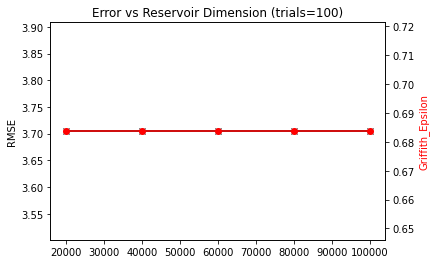

In [24]:
errors = pd.DataFrame({
    "RMSE": rmses.mean(),
    "Griffith_Epsilon": griffith_epsilons.mean()
})
ax = errors["RMSE"].plot(color="black", marker='x')
ax.set_ylabel("RMSE", color="black")
ax2 = errors["Griffith_Epsilon"].plot(secondary_y=True, color="red", marker='o')
ax2.set_ylabel("Griffith_Epsilon", color="red")
plt.title("Error vs Reservoir Dimension (trials=100)")

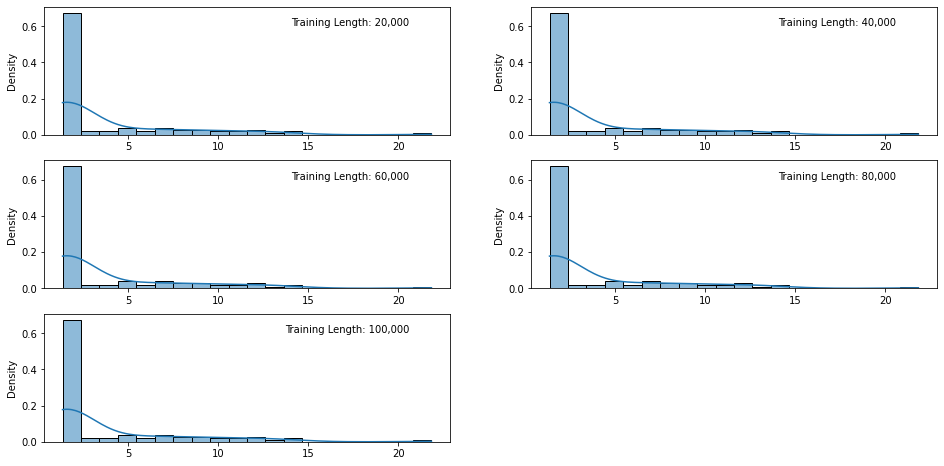

In [31]:
cols = rmses.columns
fig, axes = plt.subplots(3, 2, figsize=(16, 8))
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(data=rmses[col], kde=True, stat='density', ax=ax, bins=20)
    ax.text(0.9, 0.85, "Training Length: {:,}".format(col), horizontalalignment='right', transform=ax.transAxes)
    ax.set_xlabel("")

fig.delaxes(axes[5])
# fig.tight_layout()
# fig.legend()
# sns.displot(data=rmses[100], kind="kde")